# <div style="text-align: center">  Analyzing and Measuring Rising Sea Levels 
<div style="text-align: center">**Authors: TingFang Pan and Wendy C. Velasquez Ebanks** </div>



In [59]:
#Libraries  required for the resalization of this project
import nbconvert
import pandas as pd
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
import IPython
from statsmodels.tsa.statespace.sarimax import SARIMAX
from netCDF4 import Dataset
from datetime import datetime

## I. Introduction

<div style="text-align: justify">  In the last years, we have seen an accelerating rising on sea levels around the world. As such, our intend with the realization of this project is to analyze and measure sea levels in both coasts of the US, in order to identify and predict how this will affect the main land. By doing this we will be able to have a better perspective of the vulnerable areas, that could suffer from the rising sea levels in subsequent years based on the predictions calculated. The data used for this study is collected from National Oceanic Atmospheric Administration (NOAA)'s website on sea levels. We did the necessary processing for the **US dataset only** and particularly on three years (1997, 2008, and 2016), and data from 2000 to 2016 for predictions and forecasting on subsequent years. We will calculate the probability of danger and vulnerability of certain areas based on the predictions previously calculated by using machine learning algorithms such as the Time Series Model. The subject is worth discussing as it has a direct impact on everyone as well as higher impact on future generations. </div>    

C:\Users\Wendy\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.5,1,'The American Continent and both oceans in the globe')

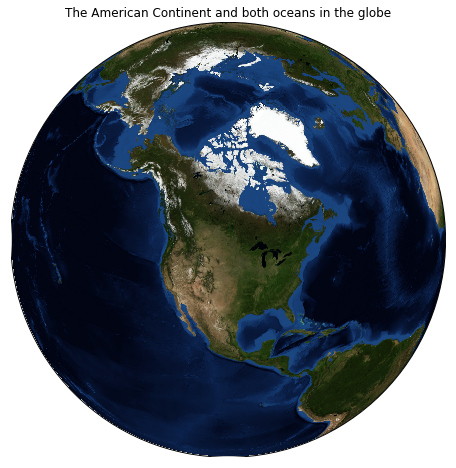

In [22]:
# defines the size of the image displayed
plt.figure(figsize=(8, 8))

#Projection type
worldMap = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)

# defines the color of the map
worldMap.bluemarble(scale=0.5);
plt.title("The American Continent and both oceans in the globe")

## II. Background

Sea levels are measured around the world and through tide stations and satellite laser altimeters. The tide stations around the globe tell the story of what is happening at a local level by measuring the height of the water along the coast and relative to a specific point on land [[3]](https://oceanservice.noaa.gov/facts/sealevel.html),  [[8]](https://www.nasa.gov/feature/goddard/2018/new-study-finds-sea-level-rise-accelerating). 

As such research and records on sea level discuss the increasing acceleration on sea levels for the last 40 years.
On "_A 20th century acceleration in global sea-level rise_" paper from Church and White (2006), they worked on data from time period 1950 to 2000, on which they found a significant acceleration on sea levels starting back on1993 and subsequent years. They also made measurements on sea level data dating on 1870 and found a significant sea‐level rise from January 1870 to December 2004 of 195 mm. An increasing rate of sea‐level rise of 1.7 ± 0.3 mm yr−1  up to that point in time and a significant acceleration of sea‐level rise of 0.013 ± 0.006 mm yr−2 [[1]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005GL024826).  

A common method among several papers on Sea Level measurements use analyze sea level data, either local (usually tide gauge data) or regional/global averages, in order to determine when and where sea level may or may not have accelerated during a specific period of time during the last century. It is consistent among studies that the increase is not constant and in order to identify significance there need to be long periods of time [[2]](https://www.researchgate.net/publication/265467321_Time_and_tide_analysis_of_sea_level_time_series). 


However, the majority of the studies  and the ones mentioned above are based on a time series method, this is due to several reasons; the approach is useful to make predictions based on the past, allow us the control of the process producing the series and give us a better understanding of the mechanism behind the series generated. It give us an intuitive description of the outputs in the time series.

## III. Process and Methodology 

The process for this study consists in the  preprocessing and collection of datasets for each city on the East and West coasts of the United States, provided by the National Oceanic Atmospheric Administration (NOAA).

The datasets contain data recorded on sea levels by day, month and year per each of the cities close to the edge of the beach on both sides. This datasets were classified as **East** and **West** and then each city dataset cleaned to obtain only three points in time (1997, 2008, 2016) and data from 2000 to 2016 for predictions and forecasting on subsequent years. Lastly, concatenated in order to make just 2 big datasets that could then be more useful to fit the data in the Time Series Model for prediction and forecasting. 

First, we read the raw files downloaded into dataframes. Then We divided the datasets into two types: 
- One is more detailed(described the hours sea_level situation)
- One is relatively simpler(described the days sea_level situation). 

The four files into four dictionaries, for each dictionary, we designated the filename as the key, and the values what is contained in each of the files read from the dataset.

In [23]:
east_dir = "DATA/EAST"   #east_new"
west_dir = "DATA/WEST"   #west_new"
east_dir_list = os.listdir(east_dir)
west_dir_list = os.listdir(west_dir)
east_d_dict = {} # key is a file name(string type), item is a dataframe
east_h_dict = {}
west_d_dict = {}
west_h_dict = {}
for east_fname in east_dir_list:
    file_directory = east_dir + "/" + east_fname 
    #read csv file to dataframe from file_directory
    
    k = east_fname.rfind(".")
    d_or_h_index = k - 1 #determine whether the file is about d or about h
    
    if(east_fname[d_or_h_index] == 'd'):
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day", "sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['day','month','year']])
        east_d_dict[east_fname] = df_file
    else:
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day","hour","sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['day','month','year']])
        east_h_dict[east_fname] = df_file

for west_fname in west_dir_list:
    file_directory = west_dir + "/" + west_fname 
    #read csv file to dataframe from file_directory
    
    k = west_fname.rfind(".")
    d_or_h_index = k - 1 #determine whether the file is about d or about h
    
    if(west_fname[d_or_h_index] == 'd'):
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day", "sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['day','month','year']])
        west_d_dict[west_fname] = df_file
    else:
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day","hour","sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['hour','day','month','year']])
        west_h_dict[west_fname] = df_file
#print([key for key in west_h_dict])
print(west_h_dict["Cordova_h.csv"])

        year  month  day  hour  sea_level                date
0       1964      5    1    10       4511 1964-05-01 10:00:00
1       1964      5    1    11       4968 1964-05-01 11:00:00
2       1964      5    1    12       5121 1964-05-01 12:00:00
3       1964      5    1    13       4999 1964-05-01 13:00:00
4       1964      5    1    14       4481 1964-05-01 14:00:00
5       1964      5    1    15       3688 1964-05-01 15:00:00
6       1964      5    1    16       2896 1964-05-01 16:00:00
7       1964      5    1    17       2256 1964-05-01 17:00:00
8       1964      5    1    18       1798 1964-05-01 18:00:00
9       1964      5    1    19       1585 1964-05-01 19:00:00
10      1964      5    1    20       1737 1964-05-01 20:00:00
11      1964      5    1    21       2164 1964-05-01 21:00:00
12      1964      5    1    22       2835 1964-05-01 22:00:00
13      1964      5    1    23       3475 1964-05-01 23:00:00
14      1964      5    2     0       4054 1964-05-02 00:00:00
15      

### Methodology: Time Series Model 

By definition A **"Time Series"** analysis is the process of using statistical techniques to model and explain a time-dependent series of data points. Time series forecasting is the process of using a model to generate predictions (forecasts) for future events based on known past events [[4]](https://wiki.pentaho.com/display/DATAMINING/Time+Series+Analysis+and+Forecasting+with+Weka#TimeSeriesAnalysisandForecastingwithWeka-1Introduction). Consequently, this model fits our data for this study perfectly.

>![time_series_graph](timeseriesim.PNG)


Where we have observations $X_1\ldots,X_n$ and $X_t$ denotes the observation at time 𝑡. In terms of machine learning,  we consider the prediction problem as a problem of supervised learning problem, where we have to infer from historical data the possibly nonlinear dependence between the input (past data sea levels) and the output (future of rising sea levels).
We will use methods to reduce trends, seasonality, leaving the stationary to make the forecasts by using the following equations to make the respective calculations that will provide the desired results.

> ### The Autoregressive Model: AR
> An autoregressive model predicts the response $X_t$ using a linear combination of past values of the variable. Parameterized by 𝑝, (the number of past values to include).

> $$X_t = \mathbf\theta_0 + \mathbf\theta_1 X_(t-1) + \mathbf\theta_2 X_(t-2) + \mathbf\theta_p X_(t-p)$$

> ### The ARIMA Model for Predictions and Forecasting

> We Combined a autoregressive (AR) with the moving average (MA) model, to get the ARIMA model.

> $$X_t = \mathbf\theta_0 + \mathbf\theta_1 X_(t-1)_ + \mathbf\theta_2 X_(t-2)_ + \mathbf\theta_p X_(t-p) + \mathbf\beta_0  + \mathbf\beta_1 \in_(t-1) + \mathbf\beta_2 \in_(t-2)+ \mathbf\beta_q \in_(t-q)$$

> Note that now we are regressing on $X'_t$, which is the differenced series $X_t$. The order
of difference is determined by the the parameter 𝑑. For example, if 𝑑 = 1:

> $$X'_t = X_t − X_(t-1)$ for $t = 2, 3,…,N $$

>So the ARIMA model is parameterized by: p (order of the AR part), q (order of the MA
part), and d (degree of differencing).

### Our Main Area of Focus

Text(0.5,1,'US Coasts')

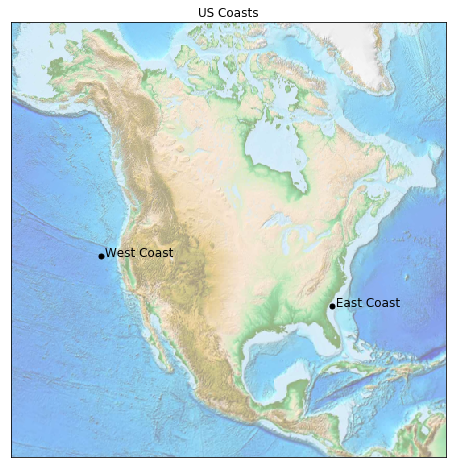

In [12]:
#dimensions of the figure
fig = plt.figure(figsize=(8, 8))

#Projection of the map
USmap = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100,)

# Topografic Scale
USmap.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
#coordinates of the points that signalize both coasts
x, y = USmap(-121.5, 60.5)
x1, y1 = USmap(-127.3, 38.7)

# adds the point and title to both sides of the map
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, ' West Coast', fontsize=12);
plt.plot(y, x, 'ok', markersize=5)
plt.text(y, x, ' East Coast', fontsize=12);
plt.title("US Coasts")

## IV. Calculations, and Findings  
After the pre-pocessing the information we plotted the information on the three years selected. from this we part our initial observations:

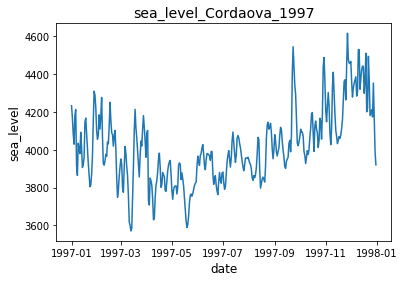

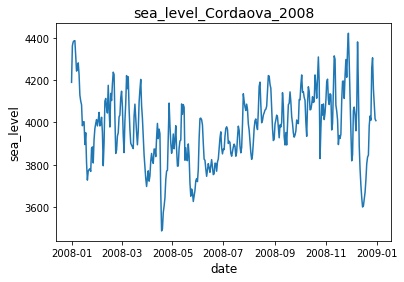

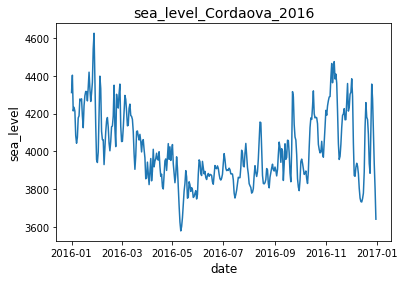

In [24]:
# Individual graphs on sea levels for only one city with the initial three points in time chosen 
# 1997, 2008, and 2016

pdf = west_d_dict['Cordova_d.csv']
df = pdf.loc[(pdf['year'] == 1997)]
plt.plot(df['date'],df['sea_level'])
plt.xlabel('date', fontsize = 12)
plt.ylabel('sea_level', fontsize = 12)
plt.title('sea_level_Cordaova_1997', fontsize = 14)
plt.show()

df = pdf.loc[(pdf['year'] == 2008)]
plt.plot(df['date'],df['sea_level'])
plt.xlabel('date', fontsize = 12)
plt.ylabel('sea_level', fontsize = 12)
plt.title('sea_level_Cordaova_2008', fontsize = 14)
plt.show()

df = pdf.loc[(pdf['year'] == 2016)]
plt.plot(df['date'],df['sea_level'])
plt.xlabel('date', fontsize = 12)
plt.ylabel('sea_level', fontsize = 12)
plt.title('sea_level_Cordaova_2016', fontsize = 14)
plt.show()

### Removing Trend and Seasonality
The most significant part preprocessing data on time series problems is removing trend and seasonality from the dataset. To make the predictions we used data from 2000 and forward and removed trend and seasonality, so we could obtain the stationary data. 

We created a rolling function that will successfully measured the trend, we used a sliding window of 365 days for it.

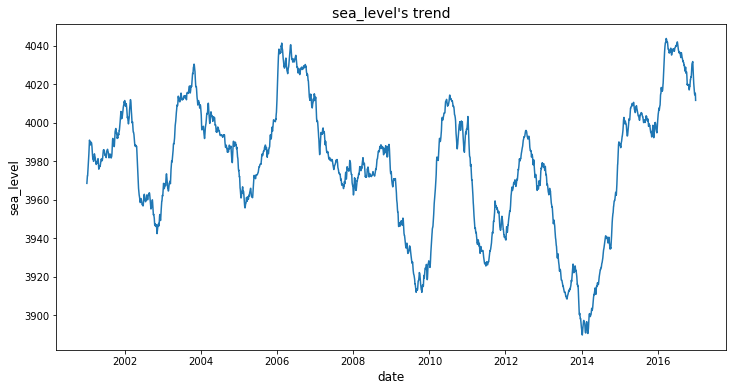

In [25]:
df = pdf.loc[(pdf['year'] >= 2000)]
moving_avg = df['sea_level'].rolling(365).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(df['date'], moving_avg)
plt.xlabel('date', fontsize=12)
plt.ylabel('sea_level', fontsize=12)
plt.title('sea_level\'s trend', fontsize=14)
plt.show()

The graph below contains our data after Removing the trend from it. 

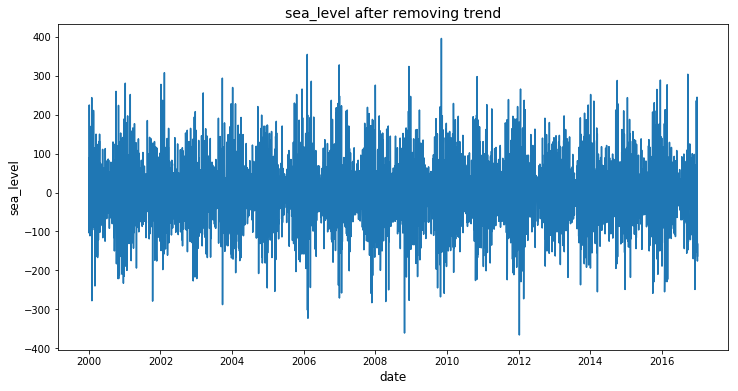

In [26]:
detrended = df['sea_level'].diff()
fig = plt.figure(figsize=(12,6))
plt.plot(df['date'], detrended)
plt.xlabel('date', fontsize=12)
plt.ylabel('sea_level', fontsize=12)
plt.title('sea_level after removing trend', fontsize=14)
plt.show()

This next graph display our results after removing both trend and seasonality from the data.

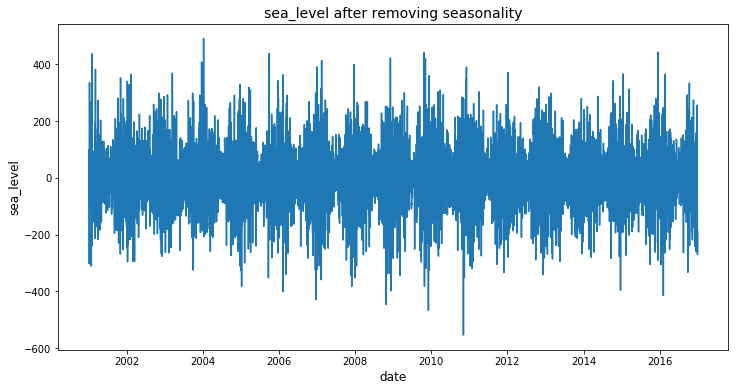

In [27]:
seasonal_diff = detrended.diff(365)
#print(type(seasonal_diff)
fig = plt.figure(figsize=(12,6))
plt.plot(df['date'], seasonal_diff)
plt.xlabel('date', fontsize=12)
plt.ylabel('sea_level', fontsize=12)
plt.title('sea_level after removing seasonality', fontsize=14)
plt.show()

### The Forecasting Process

We will predict sea levels for the next 24 months in 2017 and 2018; with data of  the last 204 months, counting from 2000 to 2016.

The data is very dense when plotting it, so we use the means of sea levels within a month to compress the data and have a better display and consistency. After that we store the result in a new dataframe called avg_month_df, on which each line represents the average sea level in that month. 

In [28]:
avg_month_df = pd.DataFrame(columns = ('year', 'month', 'sea_level','line_num'))
line_num = 0
for year in range(2000, 2017):
    year_df = df[df['year'] == year]
    for month in range(1, 13):
        month_df = year_df[year_df['month'] == month]
        days_in_a_month = (month_df.shape[0])
        sea_level_avg = month_df['sea_level'].sum()/days_in_a_month
        avg_month_df.loc[line_num] = [year, month, sea_level_avg,line_num + 1]
        line_num += 1

print(avg_month_df) 

       year  month    sea_level  line_num
0    2000.0    1.0  3995.000000       1.0
1    2000.0    2.0  4003.068966       2.0
2    2000.0    3.0  4033.451613       3.0
3    2000.0    4.0  3895.733333       4.0
4    2000.0    5.0  3869.161290       5.0
5    2000.0    6.0  3848.400000       6.0
6    2000.0    7.0  3893.096774       7.0
7    2000.0    8.0  3903.612903       8.0
8    2000.0    9.0  3989.966667       9.0
9    2000.0   10.0  4121.612903      10.0
10   2000.0   11.0  4038.733333      11.0
11   2000.0   12.0  4039.967742      12.0
12   2001.0    1.0  4228.935484      13.0
13   2001.0    2.0  3909.892857      14.0
14   2001.0    3.0  3997.806452      15.0
15   2001.0    4.0  3879.000000      16.0
16   2001.0    5.0  3923.225806      17.0
17   2001.0    6.0  3851.100000      18.0
18   2001.0    7.0  3885.580645      19.0
19   2001.0    8.0  3976.032258      20.0
20   2001.0    9.0  4091.333333      21.0
21   2001.0   10.0  4090.967742      22.0
22   2001.0   11.0  4144.633333   

Then we used the **ARIMA** model to get the  final result.

In [29]:
#print(new_df_list[0]['sea_level'].tolist())
model = SARIMAX(avg_month_df['sea_level'].tolist(),order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7658      0.048    -16.011      0.000      -0.860      -0.672
ma.S.L12      -0.9983      4.756     -0.210      0.834     -10.320       8.323
sigma2      5822.7890   2.75e+04      0.212      0.832   -4.81e+04    5.98e+04


Once we fitted our data wit the ARIMA more we could start predictions for the next 24 months (2017, 2018) and form a new dataframe containing, columns of _months(from 20171.1 and forward)_, predict _result(mean)_, upper y _(largest predict result)_, lower y _(smallest predict result)_.

In [30]:
pred = result.get_forecast(steps=24)
pred_point = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.01)
all_months = [i for i in range(1,25)]
tuple_data = zip(all_months, pred_point)
pred_data = [list(item) for item in tuple_data]
pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result'])

pred_df[pred_ci.columns[0]] = pred_ci[pred_ci.columns[0]]
pred_df[pred_ci.columns[1]] = pred_ci[pred_ci.columns[1]]#add the lower result and the upper result to the result
print(pred_df)

    months  pred_result      lower y      upper y
0      1.0  4079.116987  3876.875293  4281.358681
1      2.0  3976.464082  3768.759551  4184.168614
2      3.0  3956.943538  3743.916772  4169.970305
3      4.0  3880.683794  3662.464563  4098.903026
4      5.0  3833.016143  3609.725161  4056.307125
5      6.0  3848.485142  3620.235077  4076.735208
6      7.0  3885.655146  3652.551474  4118.758818
7      8.0  3938.111472  3700.253212  4175.969732
8      9.0  4029.725906  3787.206254  4272.245558
9     10.0  4078.198261  3831.105139  4325.291383
10    11.0  4100.517763  3848.934291  4352.101235
11    12.0  4095.384832  3839.389001  4351.380664
12    13.0  4079.508787  3816.798140  4342.219434
13    14.0  3976.855882  3709.451215  4244.260550
14    15.0  3957.335338  3685.318134  4229.352543
15    16.0  3881.075594  3604.522775  4157.628413
16    17.0  3833.407943  3552.392705  4114.423181
17    18.0  3848.876942  3563.469048  4134.284836
18    19.0  3886.046946  3596.312985  4175.780907


Now we can show the resulting prediction. The previous graph is the result of the last 204 months. And the second graph shows the actual forecast. The pink area in the graph is the range the sea level could reach at that time point in time either low or high. 

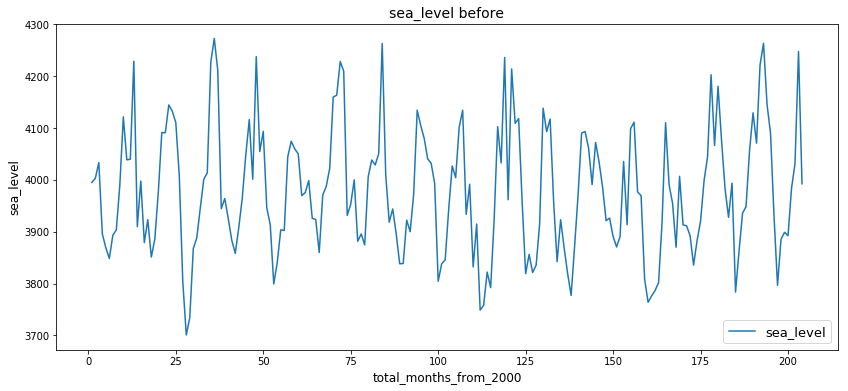

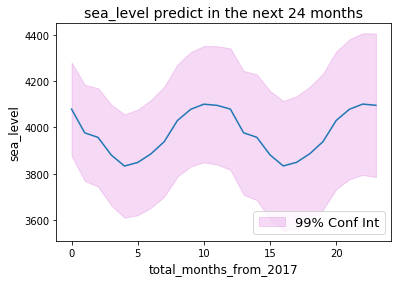

In [31]:
fig = plt.figure(figsize=(14,6))
#plt.plot(avg_month_df['sea_level'], label='Observed')
plt.plot(avg_month_df['line_num'],avg_month_df['sea_level'])


plt.xlabel('total_months_from_2000', fontsize=12)
plt.ylabel('sea_level', fontsize=12)
plt.title("sea_level before",
fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.show()
all_months = [i for i in range(1,25)]
tuple_data = zip(all_months, pred_point)
pred_data = [list(item) for item in tuple_data]


pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result'])

plt.plot(pred_point)
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],color='m', alpha=.15, label='99% Conf Int')
plt.xlabel('total_months_from_2017', fontsize=12)
plt.ylabel('sea_level', fontsize=12)
plt.title("sea_level predict in the next 24 months",
fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.show()
plt.show()

### Predict all the areas
Finally, we used the same method to predict the sea level forecast in all the areas that cover West and East coasts of United States.

**Note.-** We do not count dataframes that had spurious data or that the required years were not in the dataset. the cell below eliminate those cities from our dataset.

In [41]:
# deletes places that do not have sufficient data from both East and WEst
for key in east_d_dict:
    df = east_d_dict[key].loc[(east_d_dict[key]['year'] >= 2000)]#keep the years after 2000
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        if(year_df.shape[0] < 365):#if the year's day number is fewer than 365, there must be a lack
            del east_d_dict[key]
for key in west_d_dict:
    df = west_d_dict[key].loc[(west_d_dict[key]['year'] >= 2000)]#keep the years after 2000
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        if(year_df.shape[0] < 365):#if the year's day number is fewer than 365, there must be a lack
            del west_d_dict[key]

The predictions below are divided in East and West coasts, so the first graph contain the estimated forecast for the next 24 months in the East coast, and the second the next 24 months for the West coast.

In [48]:
east_d_pred = {}

for key in east_d_dict:#predict the east areas
    
    df = east_d_dict[key]
    df = df[df['year'] >= 2000]
    avg_month_df = pd.DataFrame(columns = ('year', 'month', 'sea_level','all_months'))
    
    all_months = 0
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        
        for month in range(1, 13):
            month_df = year_df[year_df['month'] == month]
            days_in_a_month = (month_df.shape[0])
            sea_level_avg = month_df['sea_level'].sum()/days_in_a_month
            avg_month_df.loc[all_months] = [year, month, sea_level_avg,all_months + 1]
            #print(avg_month_df)
            #print("\n")
            all_months += 1
    #print(key,avg_month_df)
    #print("\n")
    model = SARIMAX(avg_month_df['sea_level'].tolist(),order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
    result = model.fit()
    pred = result.get_forecast(steps=24)
    pred_point = pred.predicted_mean
    pred_ci = pred.conf_int(alpha=0.01)
    pred_df = pd.DataFrame(pred_point)
    all_months = [i for i in range(1,25)]
    tuple_data = zip(all_months, pred_point)
    pred_data = [list(item) for item in tuple_data]
    pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result_mean'])
    pred_df[pred_ci.columns[0]] = pred_ci[pred_ci.columns[0]]
    pred_df[pred_ci.columns[1]] = pred_ci[pred_ci.columns[1]]
    east_d_pred[key] = pred_df
    print(key+"\n", east_d_pred[key])

Apalachicola_d.csv
     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0 

Dauphin Island_d.csv
     months  pred_result_mean       lower y       upper y
0      1.0       -546.725528 -18217.974427  17124.523371
1      2.0      -2179.766137 -25249.132699  20889.600425
2      3.0       1571.796847 -25852.980549  28996.574244
3      4.0       1802.638924 -29374.935926  32980.213773
4      5.0        562.771221 -33962.059472  35087.601915
5      6.0       1845.824052 -35729.256730  39420.904834
6      7.0       1833.255163 -38562.406210  42228.916536
7      8.0        830.145604 -42201.612706  43861.903914
8      9.0       1184.126252 -44331.310806  46699.563309
9     10.0       1888.173590 -45982.255034  49758.602215
10    11.0        326.026390 -49788.859079  50440.911859
11    12.0       1385.599299 -50879.957511  53651.156109
12    13.0       -446.373582 -55031.877310  54139.130146
13    14.0      -2079.414191 -58848.252212  54689.423830
14    15.0       1672.148793 -57199.114240  60543.411827
15    16.0       1902.990870 -58998.161760  62804.143500
16    17.

Naples_d.csv
     months  pred_result_mean       lower y       upper y
0      1.0       2739.752169 -11364.783840  16844.288177
1      2.0       1721.010597 -12383.482322  15825.503517
2      3.0       2760.336254 -11344.174557  16864.847065
3      4.0       1734.072471 -12370.510048  15838.654989
4      5.0       1414.286009 -12690.418762  15518.990780
5      6.0       1566.840958 -12538.036347  15671.718262
6      7.0       1509.766201 -12595.336056  15614.868458
7      8.0        218.758579 -13886.625160  14324.142319
8      9.0       1795.576206 -12310.151298  15901.303711
9     10.0       1816.969436 -12289.171193  15923.110064
10    11.0       2172.576165 -11934.054972  16279.207303
11    12.0       2287.177491 -11816.754630  16391.109612
12    13.0       2972.439675 -11234.788558  17179.667908
13    14.0       1953.698104 -12253.496204  16160.892412
14    15.0       2993.023760 -11214.201396  17200.248917
15    16.0       1966.759977 -12240.554129  16174.074084
16    17.0       

Port Isabel_d.csv
     months  pred_result_mean      lower y      upper y
0      1.0       1664.467039 -2811.036604  6139.970681
1      2.0       1681.034786 -2794.273582  6156.343155
2      3.0       1344.742963 -3130.515293  5820.001218
3      4.0       1754.641371 -2720.613043  6229.895784
4      5.0       1774.698891 -2700.570450  6249.968232
5      6.0       1747.391526 -2727.908034  6222.691086
6      7.0       1719.995347 -2755.356750  6195.347443
7      8.0       1745.527371 -2729.914938  6220.969680
8      9.0       1889.746607 -2585.849124  6365.342338
9     10.0       1896.589516 -2579.260231  6372.439263
10    11.0       1828.597439 -2647.648179  6304.843057
11    12.0        455.204605 -4018.263704  4928.672915
12    13.0       1693.598267 -2789.997458  6177.193992
13    14.0       1710.166015 -2773.238635  6193.570665
14    15.0       1373.874191 -3109.483014  5857.231397
15    16.0       1783.772599 -2699.582946  6267.128145
16    17.0       1803.830120 -2679.542827  628

Woods Hole_d.csv
     months  pred_result_mean       lower y       upper y
0      1.0       1986.725042  -6915.381207  10888.831292
1      2.0       1970.776308 -10650.166539  14591.719156
2      3.0       2358.451599 -13111.807022  17828.710219
3      4.0       3904.167405 -13966.747658  21775.082469
4      5.0       3924.776990 -16060.475288  23910.029268
5      6.0       3970.390855 -17925.978982  25866.760692
6      7.0       3976.752312 -19676.824911  27630.329535
7      8.0       3975.979706 -21312.998503  29264.957915
8      9.0       3979.745508 -22845.114646  30804.605662
9     10.0       3998.824312 -24278.619450  32276.268074
10    11.0       3945.473229 -25713.497252  33604.443710
11    12.0       1227.029993 -29751.879652  32205.939639
12    13.0       2050.619186 -30325.462470  34426.700843
13    14.0       2034.670452 -31680.554558  35749.895463
14    15.0       2422.345743 -32580.827455  37425.518941
15    16.0       3968.061549 -32277.322576  40213.445674
16    17.0   

In [47]:
west_d_pred = {}
for key in west_d_dict:#do the same as west areas
    
    df = west_d_dict[key]
    df = df[df['year'] >= 2000]
    avg_month_df = pd.DataFrame(columns = ('year', 'month', 'sea_level','all_months'))
    
    all_months = 0
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        
        for month in range(1, 13):
            month_df = year_df[year_df['month'] == month]
            days_in_a_month = (month_df.shape[0])
            sea_level_avg = month_df['sea_level'].sum()/days_in_a_month
            avg_month_df.loc[all_months] = [year, month, sea_level_avg,all_months + 1]
            all_months += 1
    
    model = SARIMAX(avg_month_df['sea_level'].tolist(),order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
    result = model.fit()
    pred = result.get_forecast(steps=24)
    pred_point = pred.predicted_mean
    pred_ci = pred.conf_int(alpha=0.01)
    pred_df = pd.DataFrame(pred_point)
    all_months = [i for i in range(1,25)]
    tuple_data = zip(all_months, pred_point)
    pred_data = [list(item) for item in tuple_data]
    pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result_mean'])
    pred_df[pred_ci.columns[0]] = pred_ci[pred_ci.columns[0]]
    pred_df[pred_ci.columns[1]] = pred_ci[pred_ci.columns[1]]
    west_d_pred[key] = pred_df
    print(key+"\n", west_d_pred[key])

Arena Cove_d.csv
     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339

Humboldt Bay_d.csv
     months  pred_result_mean      lower y       upper y
0      1.0       5871.753833 -1409.561684  13153.069349
1      2.0       6065.133226 -1217.353675  13347.620127
2      3.0       6019.306349 -1264.528394  13303.141092
3      4.0       5977.997339 -1307.282206  13263.276884
4      5.0       5960.883300 -1325.904466  13247.671066
5      6.0       5973.946955 -1314.403058  13262.296967
6      7.0       6015.803335 -1274.167451  13305.774120
7      8.0       6025.638420 -1266.025264  13317.302103
8      9.0       6020.141663 -1273.306942  13313.590268
9     10.0       5987.218469 -1308.129706  13282.566644
10    11.0       5940.498832 -1356.880882  13237.878547
11    12.0       3870.175982 -3422.997695  11163.349659
12    13.0       5916.652723 -1397.909285  13231.214732
13    14.0       6110.032117 -1205.859259  13425.923492
14    15.0       6064.205240 -1253.193664  13381.604144
15    16.0       6022.896230 -1296.109938  13341.902398
16    17.0       6005.782191

Neah Bay_d.csv
     months  pred_result_mean      lower y      upper y
0      1.0       2025.827182 -1861.751487  5913.405851
1      2.0       1850.056145 -2054.664926  5754.777216
2      3.0       2033.412727 -1888.375822  5955.201277
3      4.0       1887.553108 -2051.228961  5826.335177
4      5.0       1824.849037 -2130.853548  5780.551621
5      6.0       1814.247506 -2158.303524  5786.798535
6      7.0       1823.754141 -2165.574179  5813.082462
7      8.0       1844.533806 -2161.501550  5850.569162
8      9.0       1882.754396 -2139.918622  5905.427414
9     10.0       2019.471568 -2019.770610  6058.713746
10    11.0       2063.466774 -1992.276924  6119.210472
11    12.0       2058.696786 -2013.481504  6130.875077
12    13.0       2040.818337 -2338.222641  6419.859316
13    14.0       1865.047301 -2540.497775  6270.592376
14    15.0       2048.403883 -2383.486789  6480.294555
15    16.0       1902.544263 -2555.536310  6360.624837
16    17.0       1839.840192 -2644.277319  6323.9

Sand Point_d.csv
     months  pred_result_mean       lower y       upper y
0      1.0       3180.137522  -4307.860607  10668.135651
1      2.0       3092.722162  -8471.322151  14656.766474
2      3.0       3010.983837 -11528.062432  17550.030106
3      4.0       2952.867758 -14048.327879  19954.063395
4      5.0       2899.706600 -16249.638906  22049.052106
5      6.0       2911.358452 -18168.352514  23991.069419
6      7.0       2915.087966 -19932.471994  25762.647925
7      8.0       2944.755682 -21543.359259  27432.870623
8      9.0       2516.330317 -23509.129881  28541.790515
9     10.0       1197.855293 -26279.066064  28674.776649
10    11.0       1210.639284 -27644.844645  30066.123214
11    12.0       1415.377302 -28754.704605  31585.459209
12    13.0       3244.361827 -28297.194081  34785.917736
13    14.0       3156.946467 -29717.637524  36031.530458
14    15.0       3075.208142 -31080.429633  37230.845917
15    16.0       3017.092063 -32373.256699  38407.440826
16    17.0   

South Beach_d.csv
     months  pred_result_mean      lower y      upper y
0      1.0       2990.270270  2504.526597  3476.013944
1      2.0       2938.305345  2452.560311  3424.050378
2      3.0       2912.414144  2426.669064  3398.159224
3      4.0       2835.113710  2349.368627  3320.858793
4      5.0       2775.398026  2289.652941  3261.143110
5      6.0       2767.450137  2281.705052  3253.195223
6      7.0       2774.446107  2288.701020  3260.191195
7      8.0       2803.394980  2317.649892  3289.140069
8      9.0       2688.572810  2202.827719  3174.317900
9     10.0       2874.089128  2388.344022  3359.834234
10    11.0       2934.222487  2448.476950  3419.968024
11    12.0       3007.091490  2521.355897  3492.827083
12    13.0       2995.992766  2509.350174  3482.635358
13    14.0       2944.027841  2457.383737  3430.671944
14    15.0       2918.136640  2431.492485  3404.780795
15    16.0       2840.836206  2354.192048  3327.480364
16    17.0       2781.120522  2294.476362  326

We manage two dictionaries and in each dictionary, the key is the filename (city name), and the item is a dataframe itself. The dataframe has four columns: _months(from 2017.1 to 2018.12)_, _predresult(mean)_, _lower y(lower bound) and the upper y(upper bound)_.

Finally, we changed the key name from filename to a location name and obtained the following result:

In [80]:
west_pred = {}
east_pred = {}
for key in east_d_pred:
    k = key.rfind("_")
    location_name = key[:k]
    east_pred[location_name] = east_d_pred[key] 
    print(location_name + "\n",east_pred[location_name])

Apalachicola
     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0       

     months  pred_result_mean      lower y      upper y
0      1.0       1733.012878 -2260.587269  5726.613024
1      2.0       1727.643532 -2265.956971  5721.244034
2      3.0       1775.137026 -2218.463746  5768.737798
3      4.0       1805.175063 -2188.425936  5798.776062
4      5.0       1814.336768 -2179.264446  5807.937983
5      6.0       1866.133232 -2127.468213  5859.734677
6      7.0       1860.070337 -2133.531385  5853.672060
7      8.0       1873.923903 -2119.678198  5867.526003
8      9.0       1960.454090 -2033.148583  5954.056763
9     10.0       1944.682440 -2048.921176  5938.286056
10    11.0       1816.736629 -2176.868629  5810.341887
11    12.0       1769.941658 -2223.667088  5763.550405
12    13.0       1804.325163 -2430.379039  6039.029365
13    14.0       1798.955817 -2435.748908  6033.660541
14    15.0       1846.449311 -2388.255823  6081.154445
15    16.0       1876.487348 -2358.218142  6111.192838
16    17.0       1885.649053 -2349.056776  6120.354883
17    18.

23    24.0        642.611645 -1771.225714  3056.449003
Sabine Pass N
     months  pred_result_mean       lower y       upper y
0      1.0        857.261976  -6984.983764   8699.507716
1      2.0       1883.389226  -6371.625648  10138.404099
2      3.0       2418.059216  -6230.145603  11066.264036
3      4.0       1790.431788  -7233.895935  10814.759510
4      5.0       2532.205617  -6853.212957  11917.624192
5      6.0       2518.450728  -7214.696604  12251.598060
6      7.0       2348.264265  -7720.640162  12417.168693
7      8.0       2475.676217  -7918.189393  12869.541827
8      9.0       2101.978933  -8607.063761  12811.021626
9     10.0       1664.497417  -9350.828592  12679.823425
10    11.0       1498.524130  -9814.999664  12812.047924
11    12.0       1116.642958 -10489.187649  12722.473564
12    13.0        917.466497 -11069.361194  12904.294188
13    14.0       1943.593747 -10346.336854  14233.524348
14    15.0       2478.263737 -10107.649280  15064.176754
15    16.0       1

In [76]:
for key in west_d_pred:
    k = key.rfind("_")
    location_name = key[:k]
    west_pred[location_name] = west_d_pred[key]
    print(location_name + "\n",west_pred[location_name])

Arena Cove
     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80913

23    24.0       2915.754656 -1845.448166  7676.957478
Sand Point
     months  pred_result_mean       lower y       upper y
0      1.0       3180.137522  -4307.860607  10668.135651
1      2.0       3092.722162  -8471.322151  14656.766474
2      3.0       3010.983837 -11528.062432  17550.030106
3      4.0       2952.867758 -14048.327879  19954.063395
4      5.0       2899.706600 -16249.638906  22049.052106
5      6.0       2911.358452 -18168.352514  23991.069419
6      7.0       2915.087966 -19932.471994  25762.647925
7      8.0       2944.755682 -21543.359259  27432.870623
8      9.0       2516.330317 -23509.129881  28541.790515
9     10.0       1197.855293 -26279.066064  28674.776649
10    11.0       1210.639284 -27644.844645  30066.123214
11    12.0       1415.377302 -28754.704605  31585.459209
12    13.0       3244.361827 -28297.194081  34785.917736
13    14.0       3156.946467 -29717.637524  36031.530458
14    15.0       3075.208142 -31080.429633  37230.845917
15    16.0       3017

### Limitations 
One of our limitations on this work relates to the different timeframes on which data started to be collected by the agency; therefore, the following cities are not included in our data set:

> **West Coast**
- Kaomalapau no data for years 1997, 2016 
- Nome and Willapa no data for 2016
- Portenllen no data in any of the years selected

> **East Coast**
- Cocoa Beach no data in any of the years selected
- Galveston no data for 2016
- May Port and south Path had no data for years 2008, 2016 

## V. Conclusions
1. Overall the Arima model on time series provide a great way to fit data that falls over periods of time, and even though it can be time intensive; gives us a good overview to see certain patterns in the data  over time.
2. Although there is a vast amount of data on sea levels, it is not all consistent, some cities have records olders than others, which adds as a limitation when doing this type of studies.
3. The more data we can have the more precise the results will  be.
4. Due to many factors such as global warming, volcanoes and pollution, that increases oceans temperature it difficult to predict based on past data, since those factors were not affecting in previous years.

**Note.-** Behind the realization of this project there was a great learning experience, Both participants learned from each other.

## References

1. [Church and N. White, "A 20th century acceleration in global sea-level rise", Geophysical Research Letters, vol. 33, no. 1, p. n/a-n/a, 2006.](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005GL024826)

2. [G. Foster and P. Brown, "Time and tide: analysis of sea level time series", Climate Dynamics, vol. 45, no. 1-2, pp. 291-308, 2014.](https://www.researchgate.net/publication/265467321_Time_and_tide_analysis_of_sea_level_time_series)

3. ["Is sea level rising?", Oceanservice.noaa.gov, 2018. Online.](https://oceanservice.noaa.gov/facts/sealevel.html) 

4. ["Time Series Analysis and Forecasting with Weka - Pentaho Data Mining - Pentaho Wiki", Wiki.pentaho.com, 2018. Online.](https://wiki.pentaho.com/display/DATAMINING/Time+Series+Analysis+and+Forecasting+with+Weka#TimeSeriesAnalysisandForecastingwithWeka-1Introduction)

5. [Time Series Optional Lecture](https://www.youtube.com/watch?v=ks6S2LnFWo8&feature=youtu.be)

6. [ VanderPlas, "Geographic Data with Basemap | Python Data Science Handbook", Jakevdp.github.io, 2018. Online.](https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html)

7. ["matplotlib basemap toolkit — Basemap Matplotlib Toolkit 1.1.0 documentation", Matplotlib.org, 2018. Online.](https://matplotlib.org/basemap/api/basemap_api.html#module-mpl_toolkits.basemap)

8. ["New Study Finds Sea Level Rise Accelerating", NASA, 2018. Online](https://www.nasa.gov/feature/goddard/2018/new-study-finds-sea-level-rise-accelerating). 